IMPORT DEPENDENCIES

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Set seeds for reproducibility

In [12]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

setting Constants

Directory Path

In [13]:
IMAGE_SIZE = 180
BATCH_SIZE = 32
# Dataset Path
base_dir = 'E:/Jupyter notebook/3_plant_Diseased/training/Potato_diseased/potato'


import data into tensorflow

In [14]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

Found 2152 files belonging to 3 classes.


In [15]:
class_names = dataset.class_names
class_names

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']

In [16]:
class_len = len(class_names)
class_len

3

# DATA VISUALIZATION

In [17]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 180, 180, 3)
[2 2 2 0 2 0 2 2 2 0 2 2 2 0 0 2 2 0 0 0 0 2 2 2 2 0 2 0 0 0 0 2]


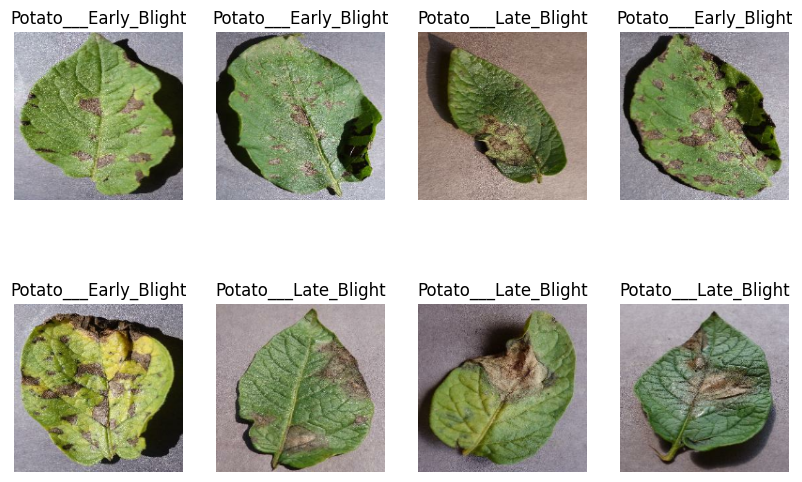

In [18]:
plt.figure(figsize=(10,10))
from numpy import uint16
for image_batch, label_batch in dataset.take(1):
  for i in range(8):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

# TRAIN TEST SPLIT
50 % TRAINING

30 % VALIDATION

10 % TEST

In [19]:
'''
import splitfolders

# Path to the input data folder
input_folder = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato'

# Path to the output folder where split data will be saved
output_folder = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato-splited'

# Define the desired split ratios
split_ratios = (0.5, 0.3, 0.2)  # train, valid, test

# Use split_folders to perform the split
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=split_ratios, group_prefix=None)
'''

"\nimport splitfolders\n\n# Path to the input data folder\ninput_folder = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato'\n\n# Path to the output folder where split data will be saved\noutput_folder = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato-splited'\n\n# Define the desired split ratios\nsplit_ratios = (0.5, 0.3, 0.2)  # train, valid, test\n\n# Use split_folders to perform the split\nsplitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=split_ratios, group_prefix=None)\n"

AUGMENT TRAIN

In [20]:
'''
import os
import cv2
from PIL import Image
import imgaug.augmenters as iaa
import numpy as np
from tqdm import tqdm

# Define your dataset directory
dataset_dir = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato-splited/train'
output_dir = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato-splited/train-augmented'
# Define augmentation methods
augmentations = [
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Affine(rotate=(-20, 20)),  # random rotations
    iaa.Multiply((0.8, 1.2)),  # random brightness
    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # gaussian blur
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # additive gaussian noise
]

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)
    os.makedirs(output_class_dir, exist_ok=True)
    
    # Loop through each image in the class directory
    for filename in tqdm(os.listdir(class_dir), desc=f'Augmenting {class_name}'):
        img_path = os.path.join(class_dir, filename)
        
        # Load image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (imgaug requires RGB images)
        
        # Apply augmentations
        for aug in augmentations:
            augmented_img = aug.augment_image(img)
            
            # Convert augmented image back to BGR for OpenCV and save
            augmented_img_bgr = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)
            output_path = os.path.join(output_class_dir, f'{os.path.splitext(filename)[0]}_{augmentations.index(aug)}.jpg')
            cv2.imwrite(output_path, augmented_img_bgr)

print('Augmentation completed!')
'''

"\nimport os\nimport cv2\nfrom PIL import Image\nimport imgaug.augmenters as iaa\nimport numpy as np\nfrom tqdm import tqdm\n\n# Define your dataset directory\ndataset_dir = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato-splited/train'\noutput_dir = 'C:/Users/LENOVO/Desktop/Jupyter notebook/5_Plant_Disease_Detection/training/Potato/potato-splited/train-augmented'\n# Define augmentation methods\naugmentations = [\n    iaa.Fliplr(0.5),  # horizontal flips\n    iaa.Affine(rotate=(-20, 20)),  # random rotations\n    iaa.Multiply((0.8, 1.2)),  # random brightness\n    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # gaussian blur\n    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # additive gaussian noise\n]\n\n# Ensure output directory exists\nos.makedirs(output_dir, exist_ok=True)\n\n# Loop through each class directory\nfor class_name in os.listdir(dataset_dir):\n    class_dir = os.path.join(dataset_dir, class_name)\n    output_class_dir = os.path.join(

# Generate 

TRAIN

TEST

VALID

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen = ImageDataGenerator(
    rescale=1./255
)

In [23]:
train_generator = train_datagen.flow_from_directory(
    'E:/Jupyter notebook/3_plant_Diseased/training/Potato_diseased/potato-splited/train-augmented',
    shuffle = True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5380 images belonging to 3 classes.


In [24]:
valid_generator = train_datagen.flow_from_directory(
    'E:/Jupyter notebook/3_plant_Diseased/training/Potato_diseased/potato-splited/valid',
    shuffle = True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 646 images belonging to 3 classes.


In [25]:
# Test Generator
test_ds = tf.keras.utils.image_dataset_from_directory(
  'E:/Jupyter notebook/3_plant_Diseased/training/Potato_diseased/potato-splited/test',
  label_mode ='categorical',
  shuffle = False,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE
)

Found 430 files belonging to 3 classes.


Shuffle the test dataset

In [26]:
# Shuffle the dataset
test_ds_shuffled = test_ds.shuffle(buffer_size=1000)

# MODEL ARCHITECTURE

In [27]:
#Define input layer
inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional layers
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.25)(x)

# Flatten layer
x = layers.Flatten()(x)

# Dense layers
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Output layer for multi-class classification
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model using Functional API
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Define optimizer with custom learning rate
learning_rate = 0.001  # Adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      30,294,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,314,435 (115.64 MB)

 Trainable params: 30,314,435 (115.64 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
EPOCHS = 20
history = model.fit(
  train_generator,
  validation_data = valid_generator,
  epochs = EPOCHS
)

Epoch 1/20


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.5398 - loss: 2.7837 - val_accuracy: 0.8096 - val_loss: 0.5752
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.8066 - loss: 0.4470 - val_accuracy: 0.9241 - val_loss: 0.2796
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.8903 - loss: 0.2812 - val_accuracy: 0.9257 - val_loss: 0.2058
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9273 - loss: 0.1922 - val_accuracy: 0.8901 - val_loss: 0.2824
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9143 - loss: 0.2238 - val_accuracy: 0.9071 - val_loss: 0.2264
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9338 - loss: 0.1794 - val_accuracy: 0.9381 - val_loss: 0.1782
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9397 - loss: 0.1585 - val_accuracy: 0.9412 - val_loss: 0.1637
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9355 - loss: 0.1762 - val_accuracy: 0.955

In [40]:
test_loss, test_accuracy = model.evaluate(test_ds)                                                         
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8364 - loss: 184.3299
Test Loss: 465.2070
Test Accuracy: 0.5791


In [41]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

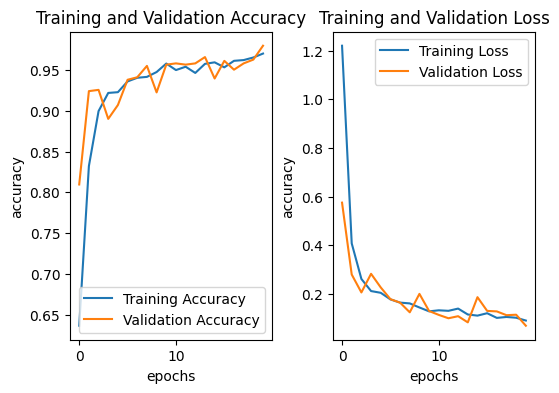

In [42]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Loss')
plt.subplots_adjust(wspace=0.3)
plt.show()

# MAP classes into ARABIC 

PROVIDE THE CURE

In [43]:
class_info = {
    0 : {'name': ' اللفحة المبكرة في البطاطس', 'description': ''' هذا المرض يسببه الفطر. يظهر على الأوراق بقع بنية دائرية صغيرة تكبر تدريجياً وتصبح ذات مراكز رمادية داكنة. البقع تنتشر على سطح الأوراق وتؤدي إلى ذبولها. المرض ينتشر بسرعة في الظروف الدافئة والرطبة.

علاج اللفحة المبكرة في البطاطس
1.  خدام أصناف مقاومة للمرض عند الزراعة
2.	الرش بمبيدات فطرية مناسبة عند ظهور أول أعراض
3.	التخلص من بقايا المحصول والأعشاب المصابة
4.	تحسين التربة وتوفير العناصر الغذائية اللازمة للنبات
5.	الحفاظ على جفاف النبات بعد الري


للوقاية من اللفحة المبكرة في البطاطس
1.  استخدام أصناف مقاومة للمرض
2.	الرش الوقائي بمبيدات فطرية مناسبة
3.	التخلص السريع من بقايا المحصول والأعشاب المصابة
4.	المحافظة على خصوبة التربة وتوفير العناصر الغذائية اللازمة
5.	ضمان جفاف النبات بعد الري

'''},
    1: {'name': 'بطاطس', 'description': 'صحيه'},
    2: {'name': 'اللفحة المتأخره في البطاطس', 'description': '''  هو مرض يصيب البطاطس والطماطم، يسببه فطر. المرض يظهر أولاً على الأوراق بقع بيضاء، ثم تصبح بني داكنة مع ظهور بقع سوداء على الساق والدرنات. المرض ينتشر بسرعة في الظروف الرطبة والباردة.

علاج لفحه البطاطس المتأخر
1.  استخدام أصناف مقاومة للمرض عند الزراعة
2.  الرش بمبيدات فطرية مناسبة عند ظهور أول أعراض
3.  إتباع ممارسات زراعية سليمة مثل التخلص من نباتات البطاطس المصابة وإتباع دورات زراعية
4.  الحفاظ على نظافة الحقل وعدم نقل المرض من مكان لآخر
5.  ضمان جفاف النبات بعد الري لتقليل فرص إصابته

للوقاية من لفحه البطاطس المتأخر
1.  استخدام أصناف مقاومة للمرض
2.  الرش الوقائي بمبيدات فطرية مناسبة
3.  إتباع دورات زراعية سليمة
4.  الحفاظ على جفاف النبات بعد الري
5.  التخلص السريع من النباتات المصابة
'''},

}

# Building a Predictive System

In [44]:
# Load and preprocess the image using Pillow
from PIL import Image
def load_and_preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)
    # Convert the image to a NumPy array
    image_array = np.array(image)
    return image_array

# Prediction function
def predict(model, image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    # Resize the image
    image = tf.image.resize(image, (180, 180))
    # Normalize the image
    image = image / 255.0
    # Perform prediction using the model
    predicted_scores = model.predict(np.expand_dims(image, axis=0))  # Expand dimensions to match the input shape
    predicted_class = np.argmax(predicted_scores)
    confidence = np.max(predicted_scores) * 100  # Convert to percentage
    return predicted_class, confidence

In [45]:
class_names = {v: k for k, v in train_generator.class_indices.items()}
class_names

{0: 'Potato___Early_Blight', 1: 'Potato___Healthy', 2: 'Potato___Late_Blight'}

In [46]:
image_path = 'E:/Jupyter notebook/3_plant_Diseased/training/Potato_diseased/potato-splited/test/Potato___Healthy/774875d3-438a-4305-afe2-7d59e2925dc4___RS_HL 1759.JPG'
predicted_class_index, confidence = predict(model, image_path)

# Get the Arabic name and description for the predicted class
arabic_name = class_info[predicted_class_index]['name']
description = class_info[predicted_class_index]['description']

# Print the result
print(f"Predicted Class: {predicted_class_index}")
print(f"Arabic Name: {arabic_name}")
print(f"Description: {description}")
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted Class: 1
Arabic Name: بطاطس
Description: صحيه
Confidence: 99.99%


# Example Usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Actual Class Index: 0, Actual Class: Potato___Early_Blight
Predicted Class Index: 0, Predicted Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Actual Class Index: 0, Actual Class: Potato___Early_Blight
Predicted Class Index: 0, Predicted Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual Class Index: 0, Actual Class: Potato___Early_Blight
Predicted Class Index: 0, Predicted Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Actual Class Index: 0, Actual Class: Potato___Early_Blight
Predicted Class Index: 0, Predicted Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual Class Index: 0, Actual Class: Potato___Early_Blight
Predicted Class Index: 0, Predicted Confidence: 99.98%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual Class Index: 0, Actual Class: Potato___Early_Blight
Predicted Class Index: 0, Predicted Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual Class Index: 0, Actual Class: Potato

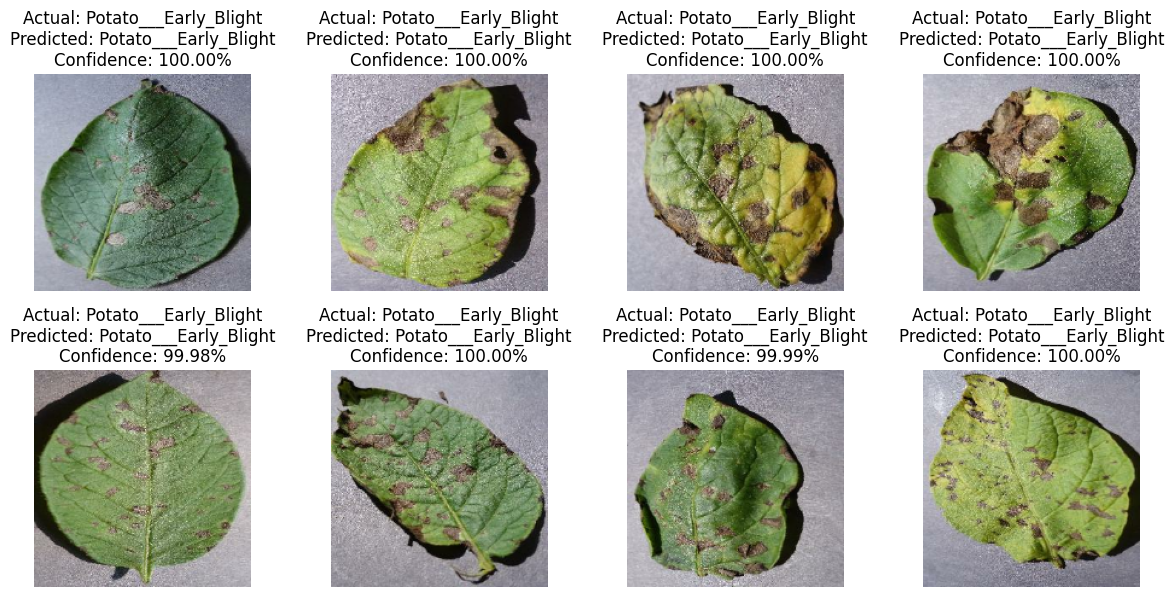

In [37]:
# Set up the figure to display images
import tempfile
plt.figure(figsize=(12, 12))

# Iterate over the first batch of images and labels from the shuffled test dataset
for images, labels in test_ds_shuffled.take(1):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        
        # Convert image tensor to numpy array with uint8 data type for visualization
        image_np = images[i].numpy().astype('uint8')
        
        # Save the image as a temporary file
        with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
            image_pil = Image.fromarray(image_np)
            image_pil.save(temp_file.name)
        
        # Display the image
        plt.imshow(image_np)
        
        # Perform prediction using the defined `predict` function
        predicted_class, confidence = predict(model, temp_file.name)
        
        # Extract the actual class index from `labels` tensor
        labels_np = labels[i].numpy()  # Convert label tensor to numpy array
        if isinstance(labels_np, np.ndarray) and labels_np.size > 1:
            actual_class_index = np.argmax(labels_np)  # For one-hot encoded labels
        else:
            actual_class_index = int(labels_np)  # For scalar labels
        
        # Verify that the actual_class_index is within valid range
        if 0 <= actual_class_index < len(class_names):
            actual_class = class_names[actual_class_index]
        else:
            actual_class = f"Unknown Class (Index: {actual_class_index})"
        
        # Print label info and predicted class for debugging
        print(f"Actual Class Index: {actual_class_index}, Actual Class: {actual_class}")
        print(f"Predicted Class Index: {predicted_class}, Predicted Confidence: {confidence:.2f}%")
        
        # Check if predicted_class is within the range of class_names
        if 0 <= predicted_class < len(class_names):
            predicted_label = class_names[predicted_class]
        else:
            predicted_label = f"Unknown Class (Index: {predicted_class})"
        
        # Set the title with formatted text showing actual label, predicted label, and confidence
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")
        
        # Turn off axis for cleaner visualization
        plt.axis("off")

plt.tight_layout()
plt.show()

# SAVE

In [47]:
# Save the entire model as a `.keras` zip archive.
model.save('potatomodel.keras')

In [39]:
#new_model = tf.keras.models.load_model('potatomodel.keras')
# Show the model architecture
#new_model.summary()